In [123]:
import numpy as np
import matplotlib.pyplot as plt


In [124]:
# θεσεις λαμπών
lamp=[[4.1,20.4,4],[14.1,21.3,3.5],[22.6,17.1,6],[5.5,12.3,4.0],[12.2,9.7,4.0],[15.3,13.8,6],[21.3,10.5,5.5],[3.9,3.3,5.0],[13.1,4.3,5.0],[20.3,4.2,4.5]]

In [125]:
lamp[::]

[[4.1, 20.4, 4],
 [14.1, 21.3, 3.5],
 [22.6, 17.1, 6],
 [5.5, 12.3, 4.0],
 [12.2, 9.7, 4.0],
 [15.3, 13.8, 6],
 [21.3, 10.5, 5.5],
 [3.9, 3.3, 5.0],
 [13.1, 4.3, 5.0],
 [20.3, 4.2, 4.5]]

In [126]:
# Ο Πίνακας Α είναι ανάλογος (propotrional) της απόστασης d^-2. Επομένως από την εκφώνηση, ο Α είναι της μορφής Α=zα
# όπου z ανήκει στο R και α είναι το κάθε στοιχείο ij του πίνακα που συμβολίζει την απόσταση του pixel της i περιοχης από την j λάμπα.  
# Επομένως η εξίσωση Αp=l γίνεται zαp=l. Το a είναι ένας 625x10 πίνακας, το p είναι ένα διάνυσμα 10x1 α΄ρα ο l θα είναι 625x1.
# Από την εκφώνηση (για την πρώτη περίπτωση) ο μέσος όρος του l είναι 1. Επομένως z=625/Σl

In [127]:
# κατασκευή του Α ως d^-2
As = []
for q in range(25):
    for w in range(25):
        
        for i,j,h in lamp:
            di=(i-(q+0.5))**2+(j-(w+0.5))**2+(h**2)
            di=1./di
            As.append(di)
As=np.array(As)
As=As.reshape(625,10)            

In [128]:
# κατασκευή του p=1
p=np.ones((10,1))
p.shape

(10, 1)

In [129]:
# εύρεση του συντελεστή z και υπολογισμός του "προσαρμοσμένου" (ανάλογου) πίνακα Α
Ld=np.matmul(As,p)
sumL=Ld.sum()
z=625/sumL
print('Ο συντελεστής είναι','\n',z)
A=z*As

Ο συντελεστής είναι 
 10.420921769912342


In [130]:
# υπολογισμός του L με μέσο όρο 1
L=np.matmul(A,p)
L.mean()

0.9999999999999998

In [131]:
# υπολογισμός του RMS της πρώτης περίπτωσης
RMS1=[]
L2=np.ones((625,1))
for i in range (1,625):
    rms=pow((L[i]-L2[i]),2)
    RMS1.append(rms)
RMS1=np.array(RMS1)
r=RMS1.sum()
rm=np.sqrt(r)/25
print('To Rms είναι','\n',rm)    

To Rms είναι 
 0.24094598836847744


In [132]:
lampc=np.matrix(lamp)

height=(lampc[:,2]).tolist()    
length=np.array(lampc[:,0])    
width=np.array(lampc[:,1])




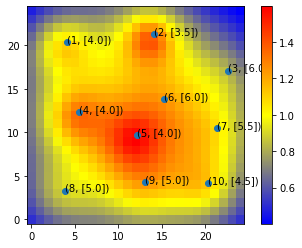

In [133]:
# plot της πρώτης περίπτωσης
colors=[(0,0,255/255),
       (255/255,255/255,0),
       (255/255,0,0)
       ]

from matplotlib.colors import ListedColormap, LinearSegmentedColormap

spcmap=LinearSegmentedColormap.from_list('specific colors',colors,N=400)
plt.imshow(L.reshape((25,25),order='F'), cmap=spcmap,origin='lower',aspect='equal',)
bar=plt.colorbar(orientation='vertical')

plt.scatter(length,width,marker="o")
for i,j in enumerate(height):
    plt.annotate((i+1,j) , (length[i], width[i]))
plt.show()
        

    

([<matplotlib.axis.YTick at 0x145be28fe20>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

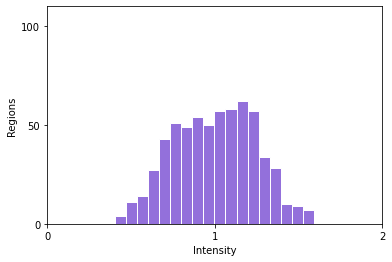

In [134]:
# plot της πρώτης περίπτωσης
import matplotlib.pyplot as plt
plt.hist(L, density=False, bins=18,color='mediumpurple',edgecolor='white')  
plt.ylabel('Regions')
plt.xlabel('Intensity')
plt.ylim((0,110))
plt.xlim((0,2))
plt.xticks([0,1,2])
plt.yticks([0,50,100])


In [135]:
# υπολογισμός του RMS της δεύτερης περίπτωσης ( RMS=0.14)
L2=np.ones((625,1))
P=np.linalg.lstsq(A,L2,rcond=None)[1]
P
MSE=float(P)
MSE
RMS=np.sqrt(MSE)/np.sqrt(625)
print('To Rms είναι','\n',RMS)

To Rms είναι 
 0.14039048134276055


In [136]:
# plot της δεύτερης περίπτωσης
Pest=np.linalg.lstsq(A,L2,rcond=None)[0]
Lest=np.matmul(A,Pest)

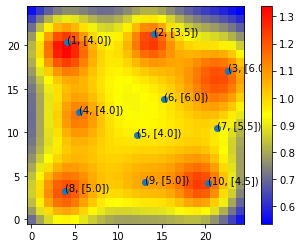

In [137]:
# plot της δεύτερης περίπτωσης
plt.imshow(Lest.reshape((25,25),order='F'), cmap=spcmap,origin='lower',aspect='equal')
bar=plt.colorbar(orientation='vertical')

plt.scatter(length,width,marker="o")
for i,j in enumerate(height):
    plt.annotate((i+1,j) , (length[i], width[i]))
plt.show()

([<matplotlib.axis.YTick at 0x145bdd99d30>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

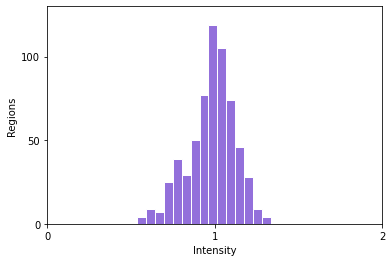

In [138]:
# plot της δεύτερης περίπτωσης
import matplotlib.pyplot as plt
plt.hist(Lest, density=False, bins=15,color='mediumpurple',edgecolor='white')  
plt.ylabel('Regions')
plt.xlabel('Intensity')

plt.ylim([0,130])
plt.xlim([0,2])
plt.xticks([0,1,2])
plt.yticks([0,50,100])
